## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


In [2]:
import numpy as np
import pandas as pd

In [3]:
#!grep -c -v "^#" "/home/ponchiom/data/data_000637.txt"
path = "/home/mattia/ponchiom/data/data_000637.txt"
N = 1310721 -1
#df = pd.read_csv("/home/ponchiom/data/data_000637.txt", delimiter=',', nrows = N)
df = pd.read_csv(path, delimiter=',', nrows = N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
df.describe()
# 1 BX_COUNTER = 30 TDC MEAS
# 1 ORBIT_CNT = 3564 BX_COUNTER
x = df.BX_COUNTER.max() + 1
print(x)

3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
M = df.ORBIT_CNT.max()
m = df.ORBIT_CNT.min()
m_bx = df.BX_COUNTER.iloc[0]
M_bx = df.BX_COUNTER.iloc[N-1]
m_tdc = df.TDC_MEAS.iloc[0]
M_tdc = df.TDC_MEAS.iloc[N-1]
print(m_bx)
print(M_bx)
# time in ns
time = (M-m)*x*25 - (m_bx*25 + m_tdc*25./30) + (M_bx*25 + M_tdc*25./30)
print(f"Time in seconds: {time*10**(-9)}")
# time in h
print(f"Time in minutes: {time*10**(-9)/60}")

2374
762
Time in seconds: 0.9804160933333335
Time in minutes: 0.016340268222222225


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
df["Time_ns"] = df.ORBIT_CNT*x*25 + df.BX_COUNTER*25 + df.TDC_MEAS*25.0/30.0
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [7]:
import numpy.random as npr

In [8]:
df["HEAD"] = pd.Series(npr.randint(0,2,N),index=df.index)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.447467e+14
1310716,0,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [9]:
new_df = df[df["HEAD"]>0]
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
...,...,...,...,...,...,...,...
1310710,1,1,36,3869211171,427,13,3.447467e+14
1310711,1,1,39,3869211171,430,0,3.447467e+14
1310713,1,0,64,3869211171,758,18,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [10]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

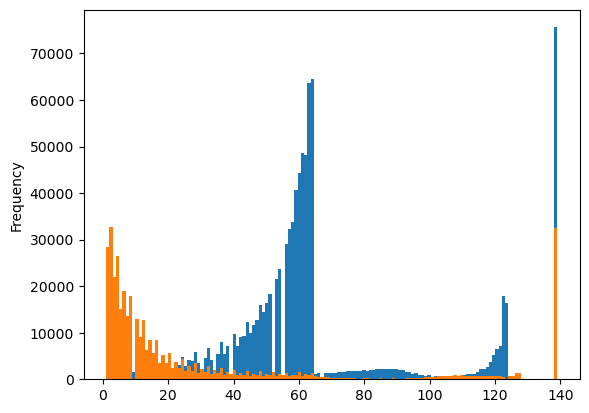

In [179]:
FPGA0 = df[df["FPGA"]==0]
FPGA1 = df[df["FPGA"]==1]

FPGA0.TDC_CHANNEL.plot(kind="hist",bins=FPGA0["TDC_CHANNEL"].max())
FPGA1.TDC_CHANNEL.plot(kind="hist",bins=FPGA1["TDC_CHANNEL"].max())

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [183]:
#Freqs = ( df.groupby(["FPGA", "TDC_CHANNEL"]) ).TDC_CHANNEL.count()
F0_max = FPGA0.groupby("TDC_CHANNEL").TDC_CHANNEL.count()
F0_max.rename_axis("Frequency",inplace=True)
print( f"For FPGA=0: \n {F0_max.sort_values(ascending=False)[:3]} \n" )

F1_max = FPGA1.groupby("TDC_CHANNEL").TDC_CHANNEL.count()
F1_max.rename_axis("Frequency",inplace=True)
print(f"For FPGA=1: \n {F1_max.sort_values(ascending=False)[:3]}")

For FPGA=0: 
 Frequency
139    75617
64     64581
63     63724
Name: TDC_CHANNEL, dtype: int64 

For FPGA=1: 
 Frequency
2      32669
139    32442
1      28438
Name: TDC_CHANNEL, dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [194]:
# Unique orbits
a = df.groupby("ORBIT_CNT").size()
# Number of unique orbits
print(f"Number of unique units:{len(a)}")
# Get all the entries that have a TDC_CH=139
TD139 = df[df["TDC_CHANNEL"]== 139]
# Use groupby to merge all the entries belonging to the same orbit and count the unique orbits by counting the rows
print(f"Unique orbits with Channel 139: {len(TD139.groupby("ORBIT_CNT").size())}")
# The number of events with TDC_CHANNEL=139 is in fact
print(f"Number of events in Channel 139: {TD139.groupby("ORBIT_CNT").size().sum()}")

Number of unique units:11001
Unique orbits with Channel 139: 10976
Number of events in Channel 139: 108059
